# HomeWork

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.text import CountVectorizer

# Part 1. Using Naïve Bayes to work with Text Data

# 1. Representing text as data

In [3]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

(1) Learn the 'vocabulary' of the training data: convert text into a matrix of token counts by using CountVectorizer()

In [5]:
vec = CountVectorizer()

In [6]:
word_matrix = vec.fit_transform(simple_train)

(2) Transform training data into a 'document-term matrix' (which is a sparse matrix). Print the sparse matrix

In [7]:
print(word_matrix)

  (0, 1)	1
  (0, 5)	1
  (0, 4)	1
  (1, 1)	1
  (1, 2)	1
  (1, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


(3) Convert the sparse matrix to a dense matrix (Hints: you can use “toarray()”)

In [8]:
print(word_matrix.toarray())

[[0 1 0 0 1 1]
 [1 1 1 0 0 0]
 [0 1 1 2 0 0]]


(4) Examine the vocabulary and document-term matrix together (Hints: use pandas DataFrame and columns by using “get_feature_names())

In [9]:
df = pd.DataFrame(word_matrix.todense())
df.columns = vec.get_feature_names_out()
df

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


(5) Transform testing data into a document-term matrix (using existing vocabulary) #simple_test = ["please don't call me"]

In [10]:
simple_test = ["please don't call me"]
test_word_matrix = vec.transform(simple_test)
test_word_matrix.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

(6) Examine the vocabulary and document-term matrix together again.

In [11]:
pd.DataFrame(test_word_matrix.todense(),columns=vec.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


# 2. Analyzing SMS data with Naïve Bayes

(1) Read into the data from the file “sms.tsv”. Give the names of columns as ['label', 'message']; and print the first 10 samples to view part of the data.

In [13]:
df = pd.read_table('sms-1.tsv',names=['label','message'])
df.sample(10)

,label,message
3337,ham,Then u go back urself lor...
3065,ham,Ok. How many should i buy.
5068,spam,83039 62735=£450 UK Break AccommodationVoucher...
3132,spam,LookAtMe!: Thanks for your purchase of a video...
4995,ham,My drive can only be read. I need to write
5091,ham,No no. I will check all rooms befor activities
3768,ham,"Sir Goodmorning, Once free call me."
4876,ham,I know dat feelin had it with Pete! Wuld get w...
2318,ham,Waqt se pehle or naseeb se zyada kisi ko kuch ...
172,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can..."


(2) Convert label to a numeric variable.## 1.2.2 Converting lable to numeric values

In [14]:
df['label'] = [0 if x == 'spam' else 1 for x in df['label']]

In [15]:
df

,label,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


(3) Then define the X and y

In [16]:
X = df['message']
y = df['label']

(4) Split into training and testing sets by train_test_split(); and print the shape of training set and test set

In [17]:

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


(5) Vectorizing SMS data by using CountVectorizer() and transform training and test sets into document-term matrices respectively

In [18]:
vec.fit(X_train)
X_train_vector = vec.transform(X_train)
X_train_array = X_train_vector.toarray()
X_train_array.shape

(4179, 7490)

In [19]:
X_test_vector = vec.transform(X_test)
X_test_array = X_test_vector.toarray()
X_test_array.shape

(1393, 7490)

(6) Use the two Naïve Bayes models (GaussianNB and MultinomialNB) to finish the following requirements, respectively:

a) calculate accuracy of predictions b) give the confusion matrix c) print message text for the false positives d) print message text for the false negatives

In [20]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [21]:
GNB = GaussianNB()
MNB = MultinomialNB()

In [22]:
y_train = y_train.astype('int')

In [23]:
GNB.fit(X_train_array,y_train)
MNB.fit(X_train_array,y_train)

MultinomialNB()

In [24]:
y_prediction_GNB = GNB.predict(X_test_array)
y_prediction_MNB = MNB.predict(X_test_array)

In [25]:
from sklearn import metrics

## 6.1 Accuracy Score

In [26]:
print("Accuracy score for Gussian NB")
print(metrics.accuracy_score(y_test,y_prediction_GNB))
print("Accuracy score for Multinomial NB")
print(metrics.accuracy_score(y_test,y_prediction_MNB))

Accuracy score for Gussian NB
0.905240488155061
Accuracy score for Multinomial NB
0.9885139985642498


## 6.2 Confusion Matrix

In [27]:
print("Confusion Matrix for Gussian NB")
print(metrics.confusion_matrix(y_test,y_prediction_GNB))
print("Confusion Matrix for Multinomial NB")
print(metrics.confusion_matrix(y_test,y_prediction_MNB))

Confusion Matrix for Gussian NB
[[ 172   14]
 [ 118 1089]]
Confusion Matrix for Multinomial NB
[[ 174   12]
 [   4 1203]]


## 6.3 False positve text

In [28]:
print("False positive for Gussian NB")
print(X_test[y_test>y_prediction_GNB])

False positive for Gussian NB
1859                     Sir, i am waiting for your call.
2952                     Hey now am free you can call me.
3142                       Customer place i will call you
2422    Err... Cud do. I'm going to  at 8pm. I haven't...
4937                             K..k.:)congratulation ..
                              ...                        
1030                           Its good, we'll find a way
2197           Not much, just some textin'. How bout you?
2173     Yavnt tried yet and never played original either
3007                       Also hi wesley how've you been
99                        I see a cup of coffee animation
Name: message, Length: 118, dtype: object


In [29]:
print("False positive for Multinomial NB")
print(X_test[y_test>y_prediction_MNB])

False positive for Multinomial NB
1988                     No calls..messages..missed calls
45                       No calls..messages..missed calls
1260    We have sent JD for Customer Service cum Accou...
2173     Yavnt tried yet and never played original either
Name: message, dtype: object


## 6.4 False Negative

In [30]:
print("False negative for Gussian NB")
print(X_test[y_test<y_prediction_MNB])

False negative for Gussian NB
3864    Oh my god! I've found your number again! I'm s...
2575    Your next amazing xxx PICSFREE1 video will be ...
2402    Babe: U want me dont u baby! Im nasty and have...
2663    Hello darling how are you today? I would love ...
751     Do you realize that in about 40 years, we'll h...
856     Talk sexy!! Make new friends or fall in love i...
3360    Sorry I missed your call let's talk when you h...
3425    Am new 2 club & dont fink we met yet Will B gr...
731     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
68      Did you hear about the new "Divorce Barbie"? I...
3132    LookAtMe!: Thanks for your purchase of a video...
Name: message, dtype: object


In [31]:
print("False negative for Multinomial NB")
print(X_test[y_test<y_prediction_MNB])

False negative for Multinomial NB
3864    Oh my god! I've found your number again! I'm s...
2575    Your next amazing xxx PICSFREE1 video will be ...
2402    Babe: U want me dont u baby! Im nasty and have...
2663    Hello darling how are you today? I would love ...
751     Do you realize that in about 40 years, we'll h...
856     Talk sexy!! Make new friends or fall in love i...
3360    Sorry I missed your call let's talk when you h...
3425    Am new 2 club & dont fink we met yet Will B gr...
731     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
68      Did you hear about the new "Divorce Barbie"? I...
3132    LookAtMe!: Thanks for your purchase of a video...
Name: message, dtype: object


# Part 2: Analyzing Boston housing

# 1) Read into the data and process it in the right format for using machine learning

In [34]:
dataset = load_boston()

In [35]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [36]:
df = pd.DataFrame(dataset.data)

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


2) Then, use the DataFrame corr() method to show what features are correlated with each other

In [38]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


(3) The columns don't have any labels. Given the name of columns as ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']; then use the DataFrame corr() again## 2.3 Giving column names and displayin correlation again

In [39]:
df.columns= dataset.feature_names


In [40]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


(4) Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. Please write codes to plot correlations by color same as (similar with) the following figure

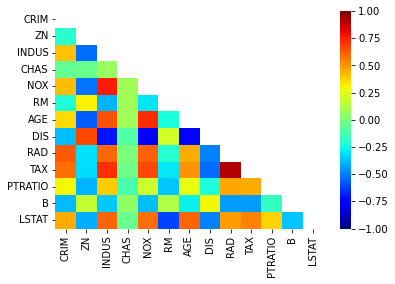

In [43]:
sns.heatmap(df.corr(),cmap='jet',mask=np.triu(np.ones_like(df.corr())),vmax=1,vmin=-1)
plt.show()

(5) According to your output, answer the following questions:

(6) Next, building the Linear Regression model

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df
y = pd.DataFrame(dataset.target,columns=['Target'])
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [46]:
X_train_data, X_test_data , y_train_data, y_test_data = train_test_split(X,y,random_state=42)
print(X_train_data.shape)
print(X_test_data.shape)
print(y_train_data.shape)
print(y_test_data.shape)

(379, 13)
(127, 13)
(379, 1)
(127, 1)


In [47]:
model.fit(X_train_data,y_train_data)
y_prediction = model.predict(X_test_data)

Please print the coefficient for your model from the above results. It requires you to print each element of the coefficient and the corresponding the feature names.

In [48]:
pd.DataFrame(model.coef_,columns=dataset.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.128323,0.029552,0.048859,2.773503,-16.238829,4.368755,-0.009248,-1.400867,0.257761,-0.009957,-0.923123,0.013185,-0.51764


Finally, to gain an understanding of how your model is performing, please score the model against 2 metrics: R squared and mean squared error

In [49]:
print("mean squared error : ", metrics.mean_squared_error(y_test_data,y_prediction))

mean squared error :  22.098694827098036


In [50]:
print("R square error : ",metrics.r2_score(y_test_data,y_prediction))

R square error :  0.6844267283527123


(a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?

(b) What you think could improve the model?

# Part 3: Face Recognition

# 3.1 Visualizing data

In [51]:
from sklearn.datasets import fetch_lfw_people

In [52]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [53]:
n_samples, h, w = faces.images.shape
print(n_samples),print(h),print(w)

1348
62
47


(None, None, None)

In [54]:
X = faces.data
n_features = X.shape[1]
X.shape

(1348, 2914)

In [55]:
y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]
y.shape

(1348,)

In [56]:
print("n_sample : %d" % n_samples)
print("n_features : %d" % n_features)
print("n_classes : %d" % n_classes)

n_sample : 1348
n_features : 2914
n_classes : 8


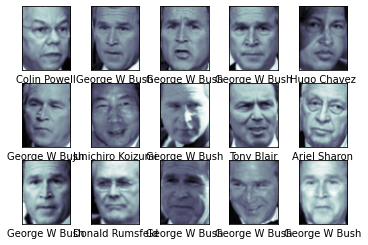

In [57]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler_model = StandardScaler()
X_train = scaler_model.fit_transform(X_train)
X_test = scaler_model.fit_transform(X_test)

# 3.2 Dimentionality Reduction

In [61]:
components = 150
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=components,svd_solver="randomized",whiten=True).fit(X_train)

In [63]:
eigenface_value = pca.components_.reshape((components,h,w))

# 3.3 Processing data for training and test

In [64]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 3.4 Using SVM Classification and GridSerachCV

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [66]:
param = {
    "C" : [1, 5, 10, 50],
    "gamma" : [0.0001, 0.0005, 0.001, 0.005],
}

In [67]:
svm_model = RandomizedSearchCV(SVC(kernel="rbf",class_weight="balanced"),param,n_iter=10)

# 3.5 Best estimator model

In [68]:
svm_model = svm_model.fit(X_test_pca,y_train)
print(svm_model.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.005)


# 3.6 Using best trained model to predict on test set

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [70]:
prediction = svm_model.best_estimator_.predict(X_test_pca)

# 3.7 Classification Report

In [71]:
print(classification_report(y_test,prediction,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.06      0.08      0.07        36
     Colin Powell       0.14      0.13      0.14       119
  Donald Rumsfeld       0.04      0.05      0.05        63
    George W Bush       0.27      0.18      0.21       259
Gerhard Schroeder       0.08      0.09      0.09        53
      Hugo Chavez       0.06      0.05      0.05        43
Junichiro Koizumi       0.09      0.10      0.09        30
       Tony Blair       0.12      0.24      0.16        71

         accuracy                           0.14       674
        macro avg       0.11      0.12      0.11       674
     weighted avg       0.16      0.14      0.15       674



# 3.8 Confusion Matrix

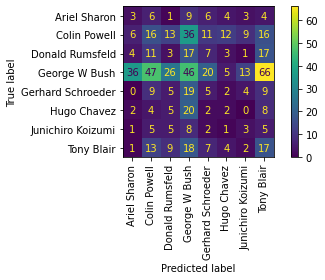

In [72]:
ConfusionMatrixDisplay.from_estimator(svm_model,X_test_pca,y_test,display_labels=target_names,xticks_rotation="vertical")
plt.tight_layout()
plt.show()